In [1]:
# imports
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectPercentile, f_classif

# Reading Data

In [2]:
data = torch.load('./Data/Features/vit_b_16_features.pt')
for key, value in data.items():
    print(f'{key.capitalize()} Data (X, y): ', value[0].shape, value[1].shape)

Train Data (X, y):  (60000, 768) (60000,)
Test Data (X, y):  (10000, 768) (10000,)


# Data Splitting

In [3]:
X_train, X_val, y_train, y_val = train_test_split(data['train'][0], data['train'][1], test_size = 5000, stratify = data['train'][1], random_state = 10)
data['train'] = [X_train, y_train] 
data['val'] = [X_val, y_val]

for key, value in data.items():
    print(f'{key.capitalize()} Data (X, y): ', value[0].shape, value[1].shape)

Train Data (X, y):  (55000, 768) (55000,)
Test Data (X, y):  (10000, 768) (10000,)
Val Data (X, y):  (5000, 768) (5000,)


# Data Transformation

## PCA

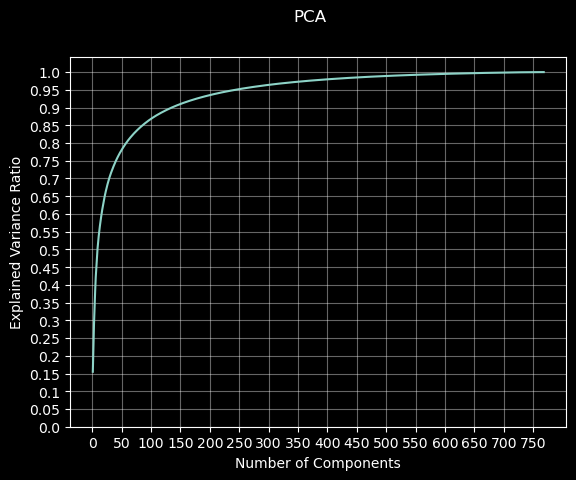

In [4]:
pca = PCA()
pca.fit(data['train'][0])
explained_variance_ratios = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratios)+1), explained_variance_ratios)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.suptitle('PCA')
plt.yticks(np.array(range(0, 105, 5))/100, np.array(range(0, 105, 5))/100)
plt.xticks(range(0, len(explained_variance_ratios)+1, 50), range(0, len(explained_variance_ratios)+1, 50))
plt.grid(True, alpha=0.4)
plt.show()

Based on this plot we can see that with 250 components we are able to explain about 95% of our variance.  
So, we will transform our data using n_components = 250

In [5]:
pca = PCA(n_components=250)
data['train'][0] = pca.fit_transform(data['train'][0])
data['val'][0] = pca.transform(data['val'][0])
data['test'][0] = pca.transform(data['test'][0])

for key, value in data.items():
    print(f'{key.capitalize()} Data (X, y): ', value[0].shape, value[1].shape)

Train Data (X, y):  (55000, 250) (55000,)
Test Data (X, y):  (10000, 250) (10000,)
Val Data (X, y):  (5000, 250) (5000,)


## ANOVA Test

In [6]:
# top_features = SelectPercentile(f_classif, percentile=90).fit_transform(*data['train'])
# top_features.shape

# EDA

# Dimensionality Reduction

# Models